In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
df = pd.read_csv("historical-daily-weather\historical-daily-weather-records.csv")
df.head()

,date,station,daily_rainfall_total,highest_30_min_rainfall,highest_60_min_rainfall,highest_120_min_rainfall,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed
0,2009-01-01,Admiralty,na,na,na,na,na,na,na,na,na
1,2009-01-02,Admiralty,na,na,na,na,na,na,na,na,na
2,2009-01-03,Admiralty,na,na,na,na,na,na,na,na,na
3,2009-01-04,Admiralty,na,na,na,na,na,na,na,na,na
4,2009-01-05,Admiralty,na,na,na,na,na,na,na,na,na


In [3]:
df.shape

(2859, 11)

In [4]:
for col in df.columns:
    print(f"No. of NaN values in {col}: {str(df[col].isna().sum())}")

No. of NaN values in date: 0
No. of NaN values in station: 0
No. of NaN values in daily_rainfall_total: 0
No. of NaN values in highest_30_min_rainfall: 0
No. of NaN values in highest_60_min_rainfall: 0
No. of NaN values in highest_120_min_rainfall: 0
No. of NaN values in mean_temperature: 0
No. of NaN values in maximum_temperature: 0
No. of NaN values in minimum_temperature: 0
No. of NaN values in mean_wind_speed: 0
No. of NaN values in max_wind_speed: 0


Null values are represented as "na" instead of missing values.

In [5]:
for col in df.columns:
    print(f"No. of 'na' values in {col}: {str((df[col] == 'na').sum())}")

No. of 'na' values in date: 0
No. of 'na' values in station: 0
No. of 'na' values in daily_rainfall_total: 105
No. of 'na' values in highest_30_min_rainfall: 1755
No. of 'na' values in highest_60_min_rainfall: 1755
No. of 'na' values in highest_120_min_rainfall: 1755
No. of 'na' values in mean_temperature: 139
No. of 'na' values in maximum_temperature: 115
No. of 'na' values in minimum_temperature: 115
No. of 'na' values in mean_wind_speed: 96
No. of 'na' values in max_wind_speed: 97


In [6]:
#Drop highest rainfall columns as there are too many missing values
df.drop(columns=["highest_30_min_rainfall", "highest_60_min_rainfall", "highest_120_min_rainfall"], inplace=True)

In [7]:
df.replace("na", np.nan, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2859 entries, 0 to 2858
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date                  2859 non-null   object
 1   station               2859 non-null   object
 2   daily_rainfall_total  2754 non-null   object
 3   mean_temperature      2720 non-null   object
 4   maximum_temperature   2744 non-null   object
 5   minimum_temperature   2744 non-null   object
 6   mean_wind_speed       2763 non-null   object
 7   max_wind_speed        2762 non-null   object
dtypes: object(8)
memory usage: 178.8+ KB


In [9]:
for col in df.columns:
    if col not in ["date", "station"]:
        df = df.astype({col: "float"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2859 entries, 0 to 2858
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  2859 non-null   object 
 1   station               2859 non-null   object 
 2   daily_rainfall_total  2754 non-null   float64
 3   mean_temperature      2720 non-null   float64
 4   maximum_temperature   2744 non-null   float64
 5   minimum_temperature   2744 non-null   float64
 6   mean_wind_speed       2763 non-null   float64
 7   max_wind_speed        2762 non-null   float64
dtypes: float64(6), object(2)
memory usage: 178.8+ KB


In [10]:
df["date"] = pd.to_datetime(df["date"], infer_datetime_format=True)
print(df.info())
df.set_index('date', inplace=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2859 entries, 0 to 2858
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  2859 non-null   datetime64[ns]
 1   station               2859 non-null   object        
 2   daily_rainfall_total  2754 non-null   float64       
 3   mean_temperature      2720 non-null   float64       
 4   maximum_temperature   2744 non-null   float64       
 5   minimum_temperature   2744 non-null   float64       
 6   mean_wind_speed       2763 non-null   float64       
 7   max_wind_speed        2762 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 178.8+ KB
None


,station,daily_rainfall_total,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed
date,,,,,,,
2009-01-01,Admiralty,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-02,Admiralty,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-03,Admiralty,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-04,Admiralty,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,Admiralty,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Add missing dates and use interpolation to fill in missing values.
df = df.asfreq('D')
df = df[["daily_rainfall_total", "mean_temperature", "maximum_temperature", "minimum_temperature", "mean_wind_speed", "max_wind_speed"]].interpolate()
df.head(30)

,daily_rainfall_total,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed
date,,,,,,
2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-09,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Remove the missing data at the start of the time period as there are no initial values to reference for interpolation.
df = df.loc["2009-01-24": , :]
df.head()

,daily_rainfall_total,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed
date,,,,,,
2009-01-24,0.0,26.80,31.4,24.4,11.7,38.2
2009-01-25,0.8,25.90,27.8,24.4,12.7,38.2
2009-01-26,0.0,25.90,29.6,23.7,12.4,42.5
2009-01-27,0.0,26.25,30.2,23.7,10.4,38.9
2009-01-28,0.0,26.60,31.9,23.7,10.3,32.4


In [13]:
df["temperature_range"] = df["maximum_temperature"] - df["minimum_temperature"]
df.head()

,daily_rainfall_total,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed,temperature_range
date,,,,,,,
2009-01-24,0.0,26.80,31.4,24.4,11.7,38.2,7.0
2009-01-25,0.8,25.90,27.8,24.4,12.7,38.2,3.4
2009-01-26,0.0,25.90,29.6,23.7,12.4,42.5,5.9
2009-01-27,0.0,26.25,30.2,23.7,10.4,38.9,6.5
2009-01-28,0.0,26.60,31.9,23.7,10.3,32.4,8.2


In [14]:
df.describe()

,daily_rainfall_total,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed,temperature_range
count,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000
mean,6.850170,27.617863,31.723461,24.951547,7.805676,34.716625,6.771915
std,13.319247,1.132372,1.699498,1.157943,2.360261,8.370948,1.590305
min,0.000000,23.300000,24.200000,21.600000,3.700000,11.500000,1.200000
25%,0.000000,26.900000,30.700000,24.200000,6.200000,28.800000,5.700000
50%,0.600000,27.548387,31.900000,24.900000,7.080519,33.500000,6.700000
75%,7.800000,28.400000,32.900000,25.700000,8.800000,39.200000,7.800000
max,142.000000,30.800000,36.600000,28.500000,18.700000,86.800000,13.300000


c:\Users\waiho\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\waiho\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\waiho\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c

<AxesSubplot:xlabel='temperature_range'>

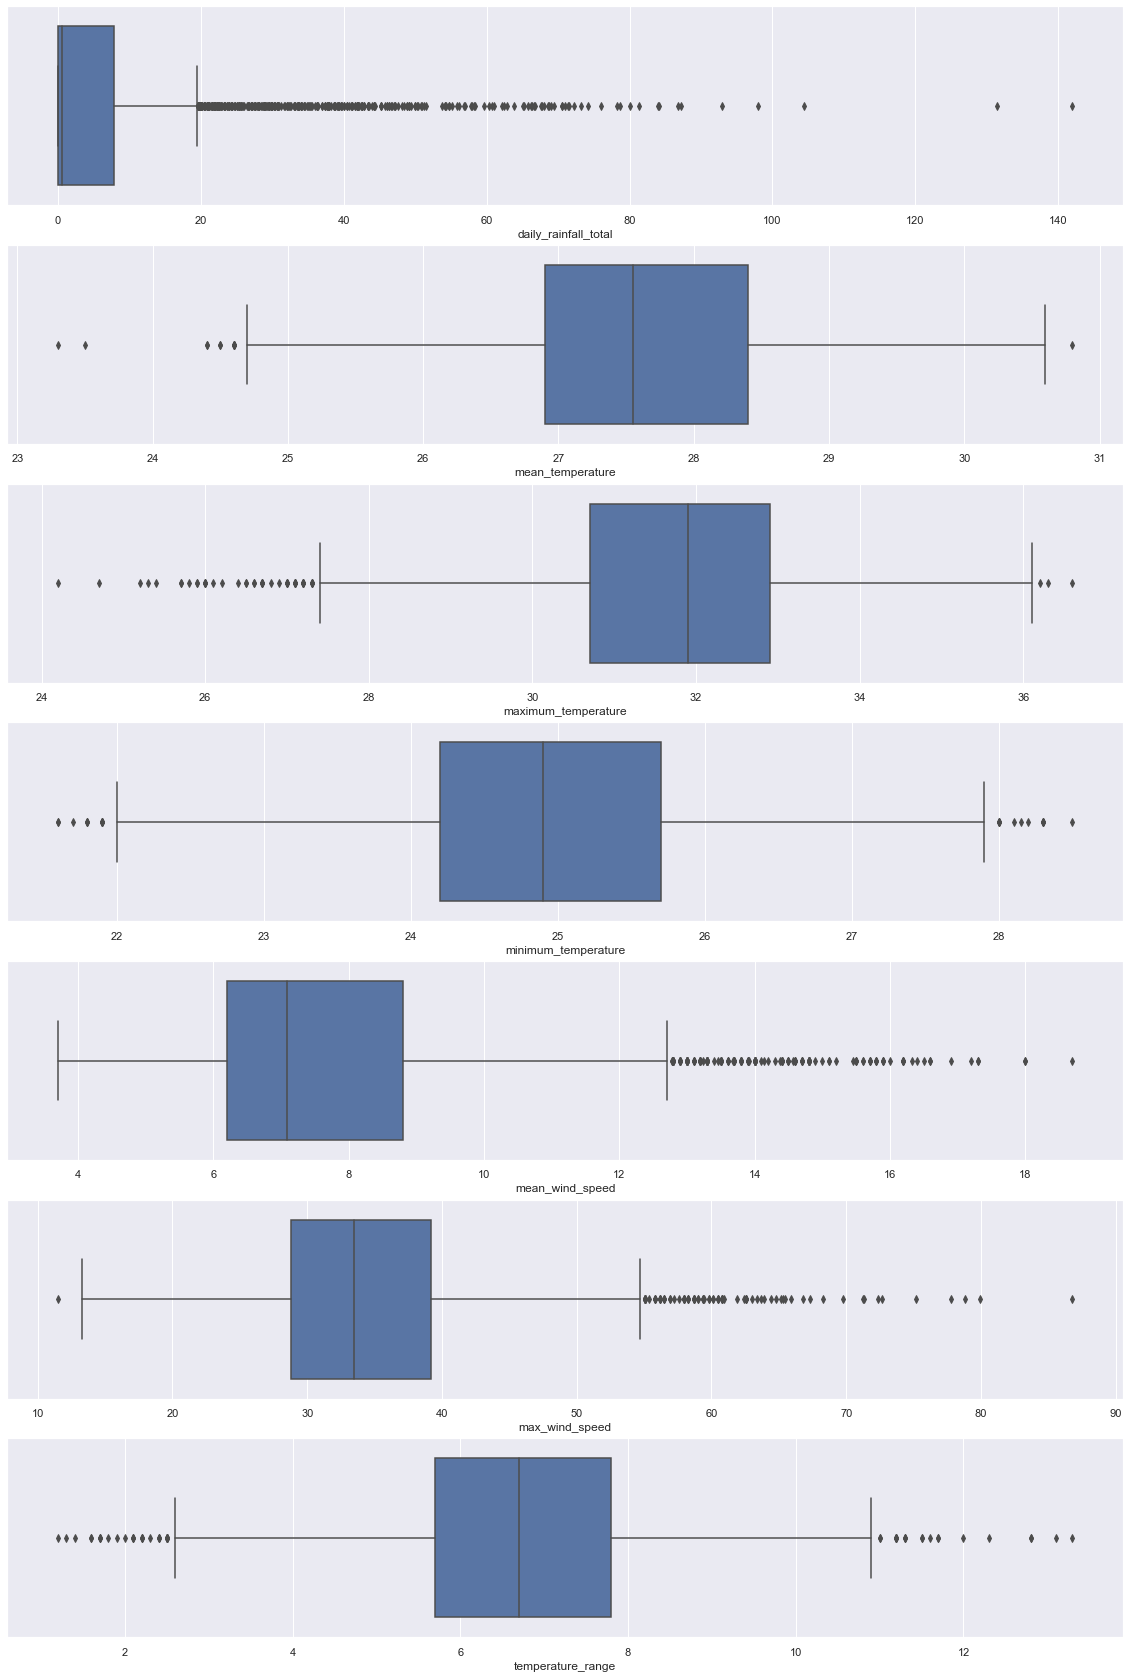

In [15]:
fig,axs = plt.subplots(7,1,figsize=(20,30))
sns.boxplot(df["daily_rainfall_total"],ax=axs[0])
sns.boxplot(df["mean_temperature"],ax=axs[1])
sns.boxplot(df["maximum_temperature"],ax=axs[2])
sns.boxplot(df["minimum_temperature"],ax=axs[3])
sns.boxplot(df["mean_wind_speed"],ax=axs[4])
sns.boxplot(df["max_wind_speed"],ax=axs[5])
sns.boxplot(df["temperature_range"],ax=axs[6])

No erroneous values which are physically impossible.

#Individual features over time

In [16]:
#Function to plot feature over time with trend line
def tsplot(col):
    x_num = matplotlib.dates.date2num(df.index)
    z = np.polyfit(x_num, df[col], 1)
    p = np.poly1d(z)
    plt.subplots(figsize=(30,10))
    plt.plot(df[col])
    plt.plot(x_num, p(x_num))
    plt.ylabel(col)

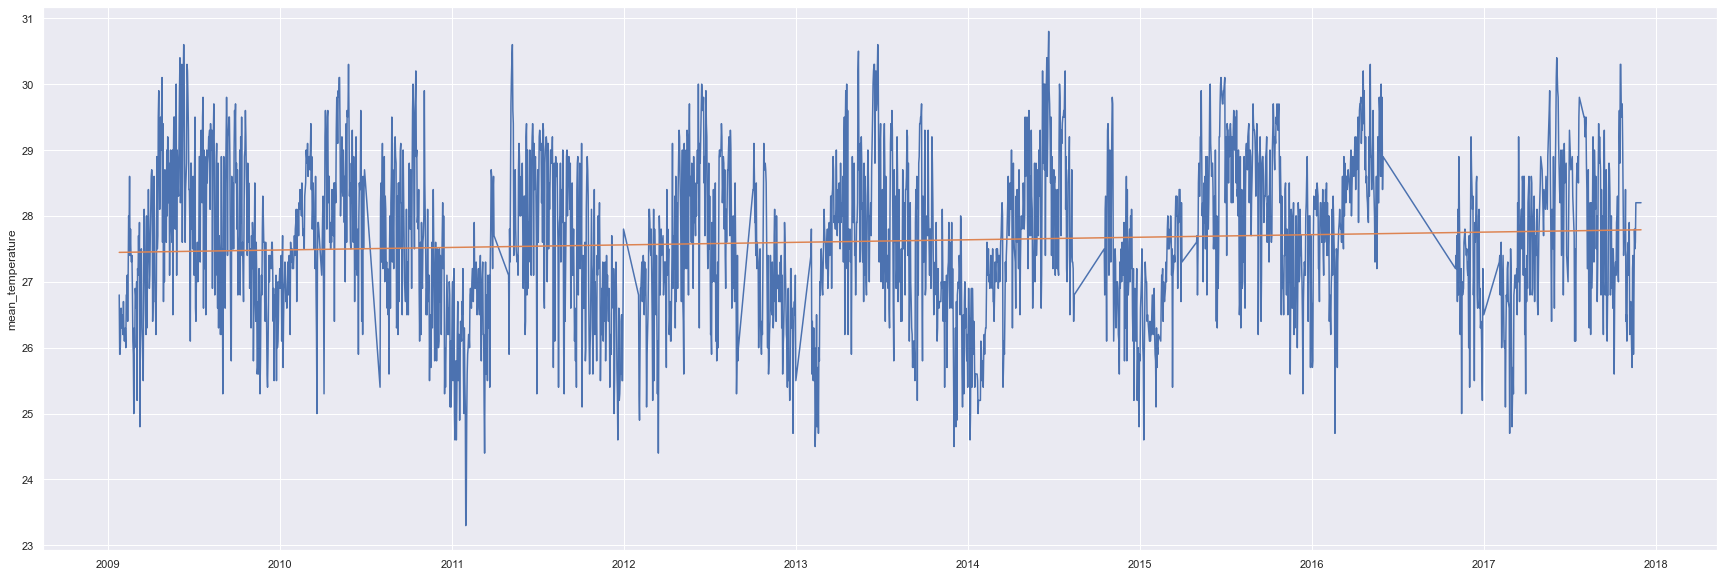

In [17]:
tsplot("mean_temperature")

Increasing trend in mean temperature over the years. Temperatures tend to bottom out at the start of the year and peak in the middle of the year.

In [18]:
df.loc[df["mean_temperature"].idxmax()]

daily_rainfall_total     0.0
mean_temperature        30.8
maximum_temperature     34.3
minimum_temperature     28.3
mean_wind_speed          6.7
max_wind_speed          30.6
temperature_range        6.0
Name: 2014-06-21 00:00:00, dtype: float64

Highest mean temperature of 30.8 degrees celsius was recorded on 21/6/14.

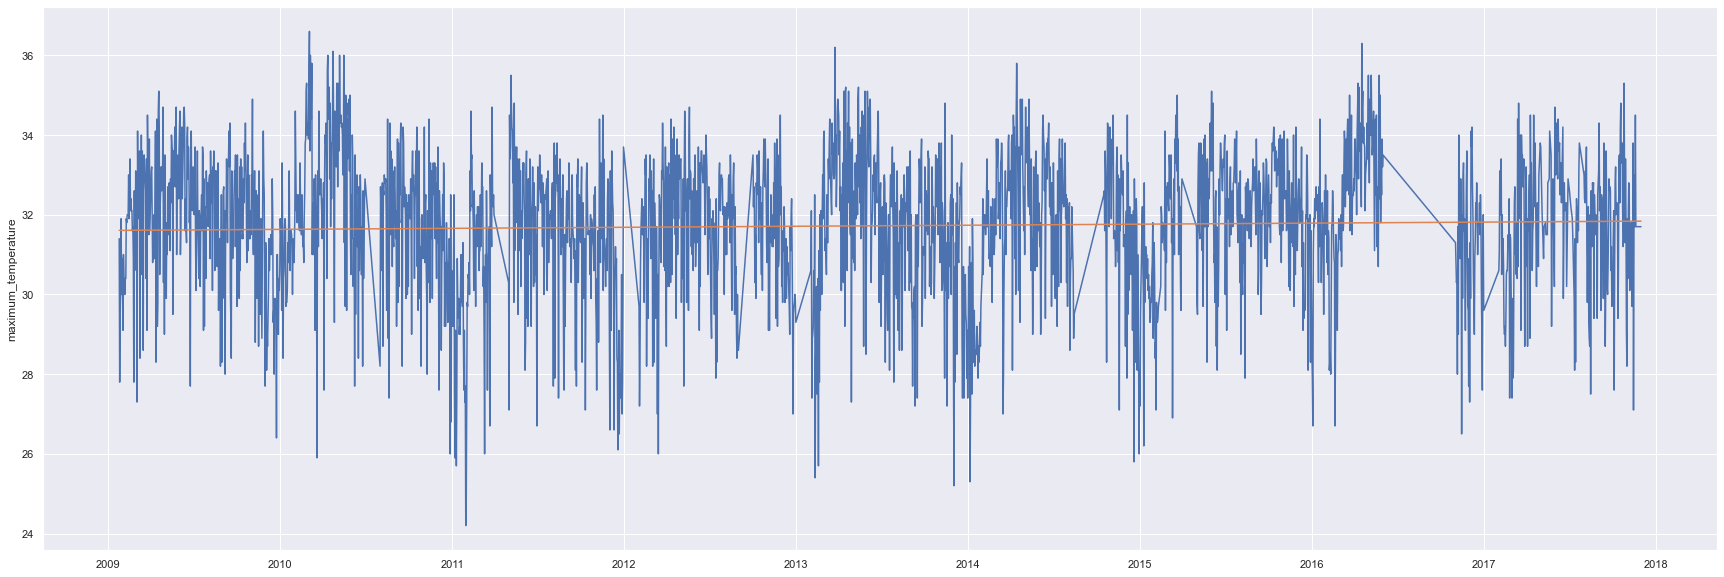

In [19]:
tsplot("maximum_temperature")

In [20]:
df.loc[df["maximum_temperature"].idxmax()]

daily_rainfall_total     0.2
mean_temperature        28.9
maximum_temperature     36.6
minimum_temperature     25.4
mean_wind_speed          9.7
max_wind_speed          33.8
temperature_range       11.2
Name: 2010-03-04 00:00:00, dtype: float64

Highest temperature recorded was 36.6 degrees celsius on 4/3/14.

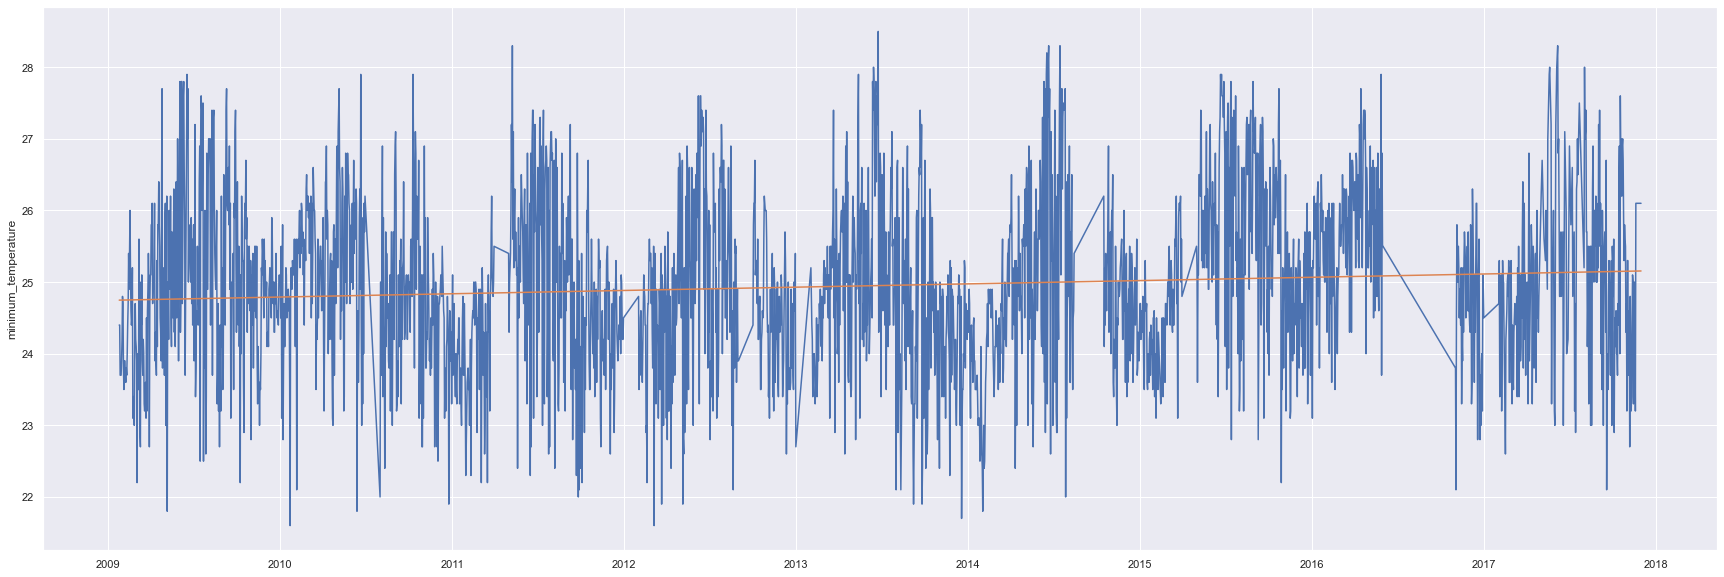

In [21]:
tsplot("minimum_temperature")

In [22]:
df.loc[df["minimum_temperature"].idxmin()]

daily_rainfall_total    24.0
mean_temperature        26.2
maximum_temperature     30.6
minimum_temperature     21.6
mean_wind_speed          7.9
max_wind_speed          49.3
temperature_range        9.0
Name: 2010-01-22 00:00:00, dtype: float64

Lowest temperature recorded was 21.6 degrees celsius on 22/1/10.

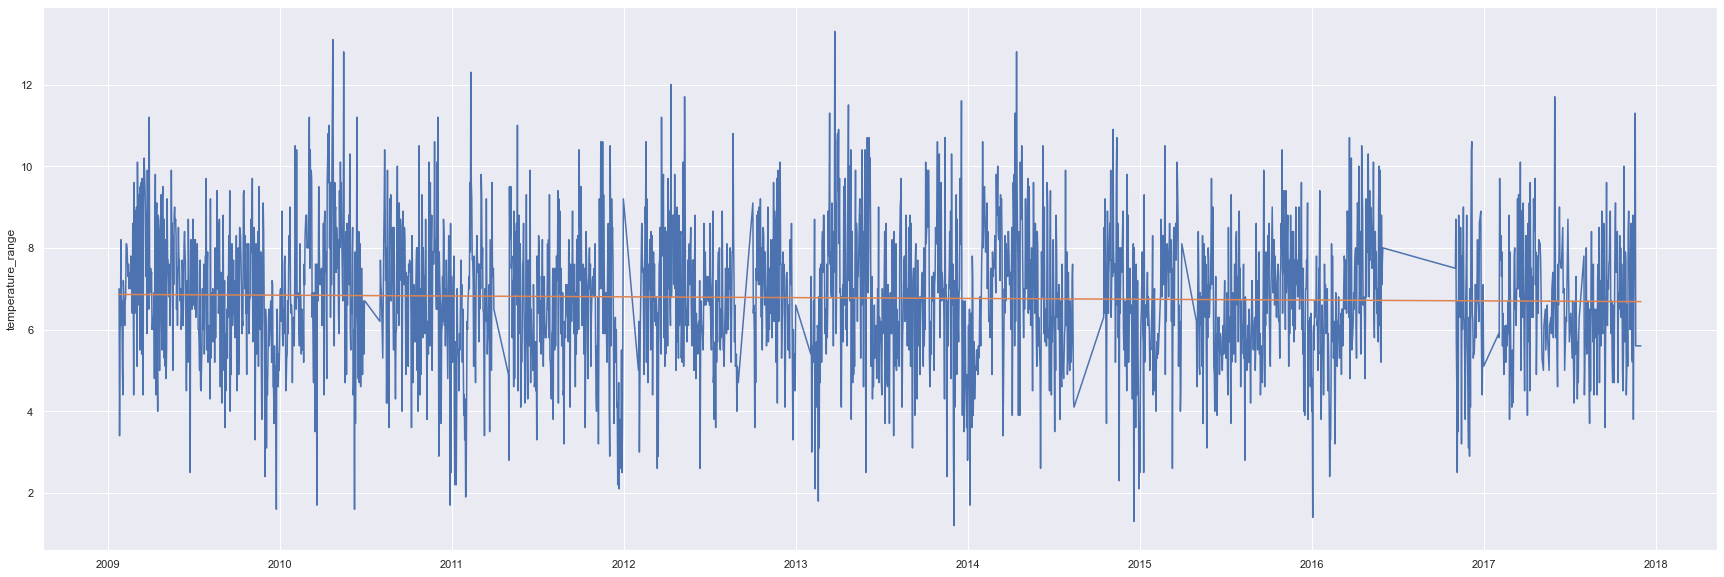

In [23]:
tsplot("temperature_range")

In [24]:
df.loc[df["temperature_range"].idxmax()]

daily_rainfall_total    50.0
mean_temperature        27.9
maximum_temperature     36.2
minimum_temperature     22.9
mean_wind_speed          7.0
max_wind_speed          60.5
temperature_range       13.3
Name: 2013-03-24 00:00:00, dtype: float64

Largest temperature range recorded was 13.3 degrees celsius, on 24/3/13.

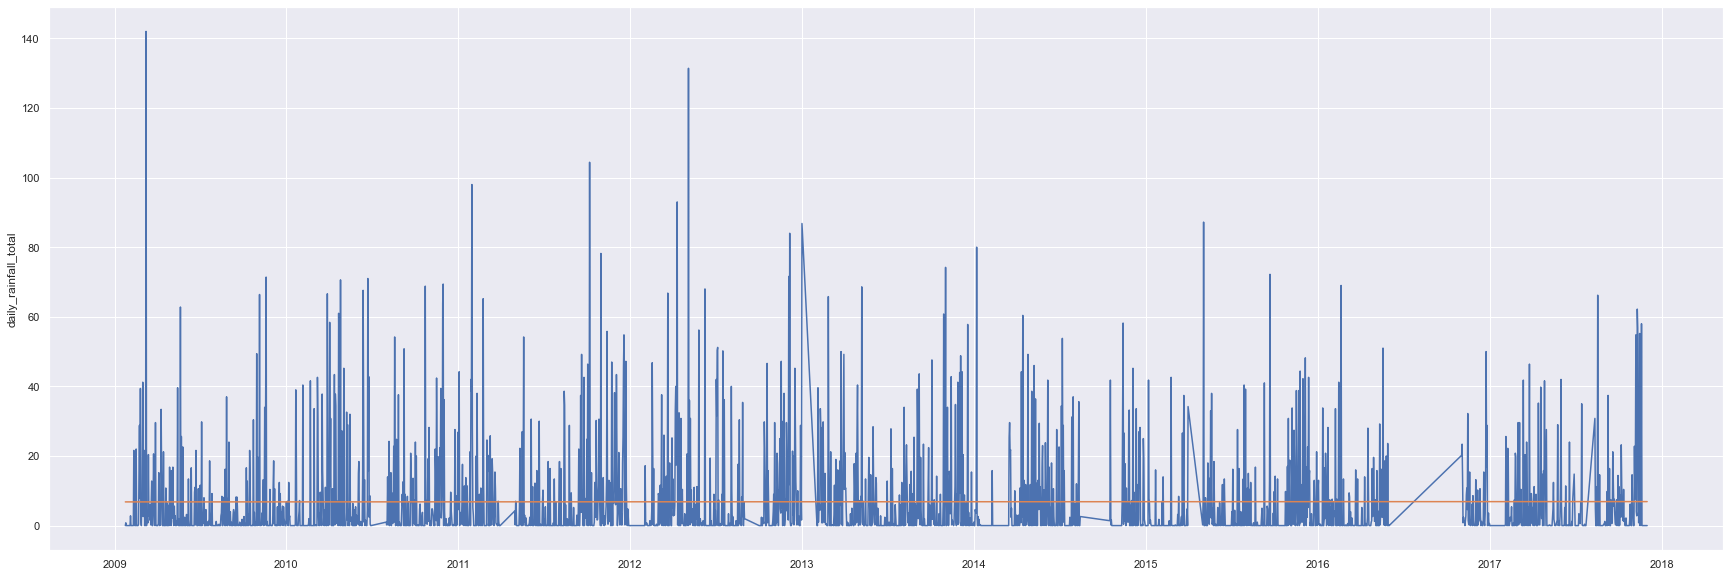

In [25]:
tsplot("daily_rainfall_total")

In [26]:
df.loc[df["daily_rainfall_total"].idxmax()]

daily_rainfall_total    142.0
mean_temperature         24.8
maximum_temperature      28.4
minimum_temperature      22.9
mean_wind_speed           9.6
max_wind_speed           35.3
temperature_range         5.5
Name: 2009-03-09 00:00:00, dtype: float64

Highest total rainfall recorded was 142mm on 9/3/09.

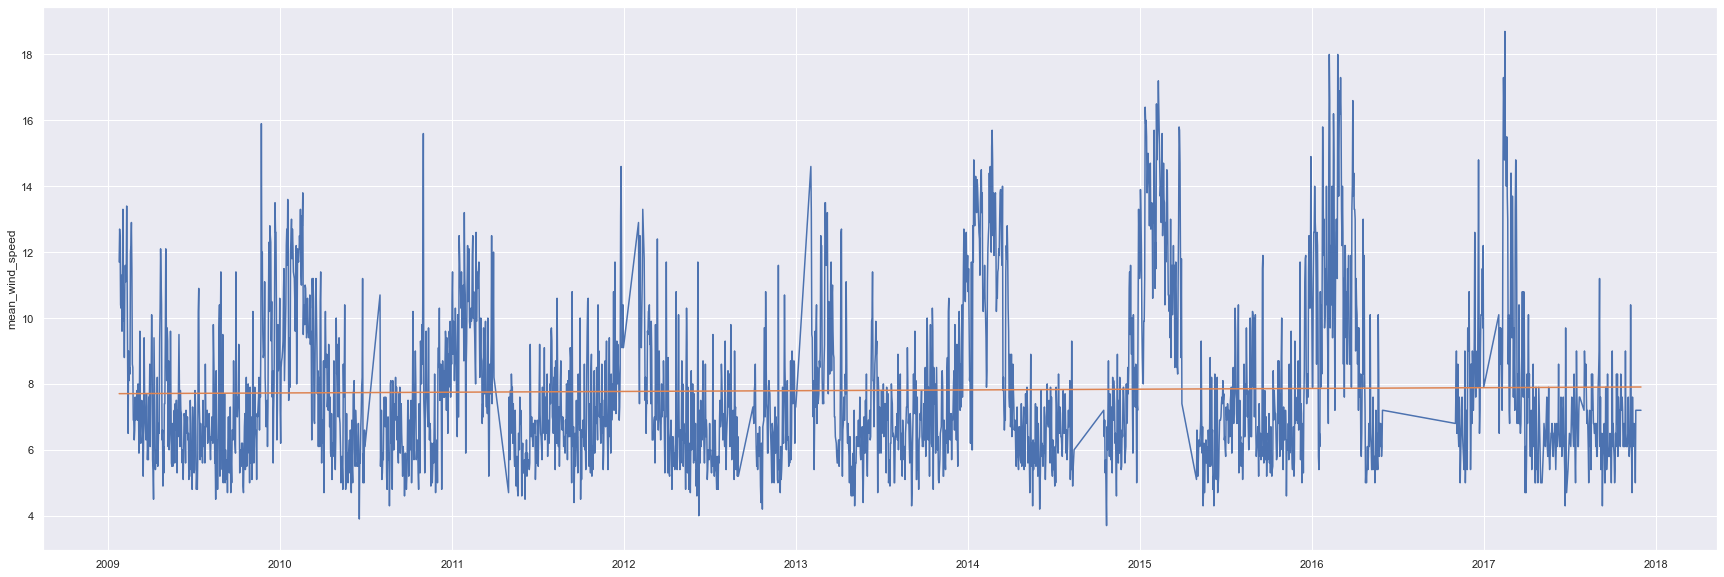

In [27]:
tsplot("mean_wind_speed")

Mean wind speed has an increasing trend over the years. Mean wind speed generally peaks at the start of the year and bottoms out in the middle of the year.

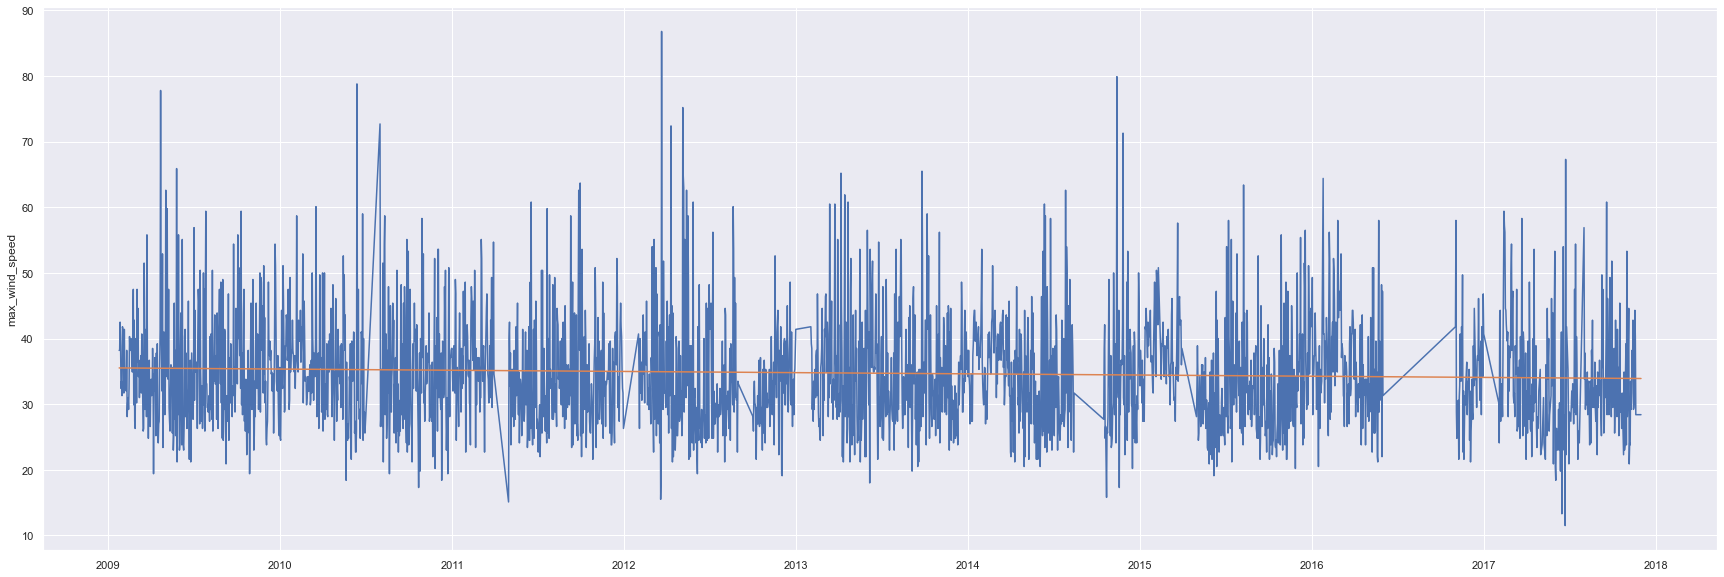

In [28]:
tsplot("max_wind_speed")

In [29]:
df.loc[df["max_wind_speed"].idxmax()]

daily_rainfall_total    66.8
mean_temperature        27.4
maximum_temperature     33.1
minimum_temperature     21.9
mean_wind_speed          8.0
max_wind_speed          86.8
temperature_range       11.2
Name: 2012-03-21 00:00:00, dtype: float64

Highest wind speed ever recorded was 86.8km/h on 21/3/12.

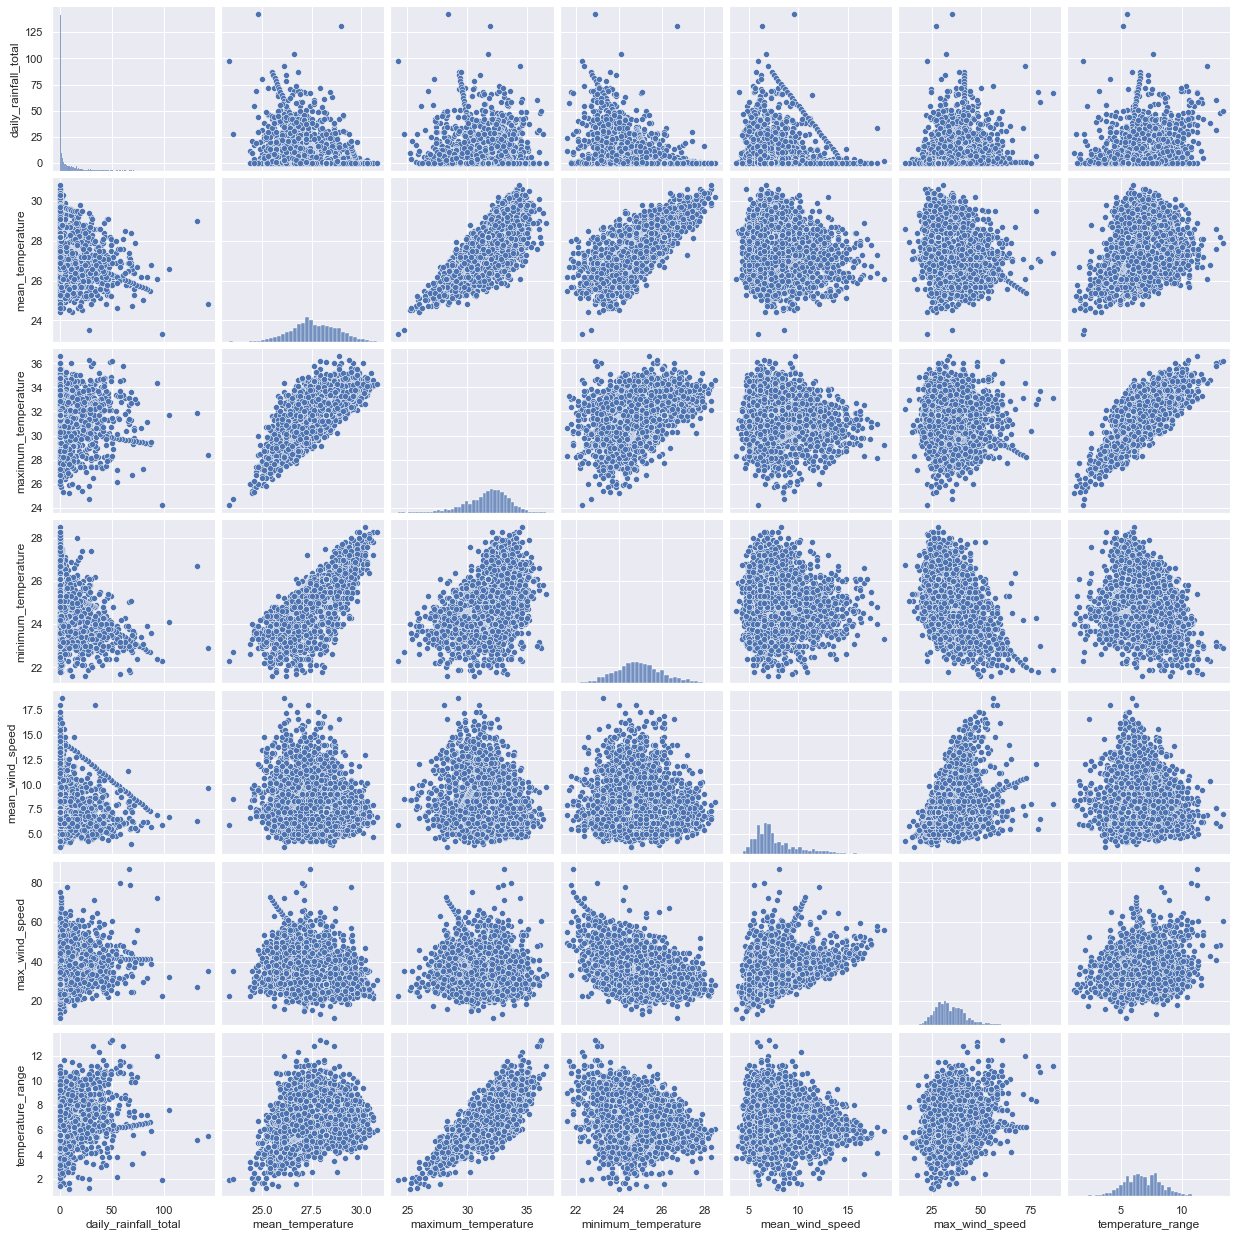

In [30]:
sns.pairplot(data=df)

<AxesSubplot:>

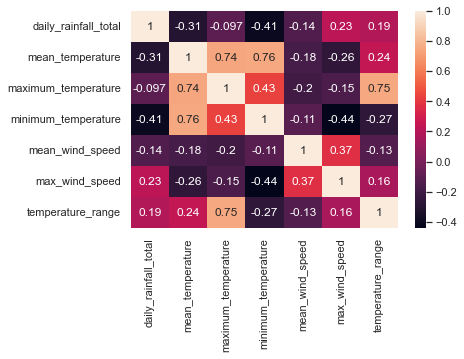

In [31]:
corr = df.corr()
sns.heatmap(corr, annot=True)

Linear relationships between mean temperature and non-temperature features (starting from strongest): 
negative linear relationship with daily total rainfall (-0.3)
negative linear relationship with max wind speed (-0.25)
negative linear relationship with mean wind speed (-0.17)

In [32]:
df.to_csv("historical-daily-weather\Prepped data.csv")